# ML PROJECT
By: Dhyey Shah

# Real Estate Price Prediction - Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset
After importing the pre required libraries, proceeding to load the House Prices Dataset (Used from kaggle.com)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1 = df.drop(['area_type','availability', 'society', 'balcony'], axis = 1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


## Data Pre-Processing
After taking the basic insights of the dimensions and the description of the data, proceeding with the Pre-Processing. This step would include handling Null Values(if any), creating a interpretable dataframe(with imp/required insights),Feature additions etc. 

In [7]:
df1.isnull().any()

location       True
size           True
total_sqft    False
bath           True
price         False
dtype: bool

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
import warnings
warnings.filterwarnings('ignore')

df2['BHK'] = df2["size"].apply(lambda x: x.split(' ')[0])
df2.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df2['BHK'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [13]:
df2.drop(['size'], axis = 1, inplace = True)
df2.head()

,location,total_sqft,bath,price,BHK
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return True
    return False

In [15]:
df2[df2['total_sqft'].apply(is_float)].head(15)

,location,total_sqft,bath,price,BHK
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,63.770,2
648,Arekere,4125Perch,9.0,265.000,9
661,Yelahanka,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [16]:
def convt_range2num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return False

In [17]:
convt_range2num("1115-1130")

1122.5

In [18]:
df3 = df2.copy()

In [19]:
df3['total_sqft'] = df3['total_sqft'].apply(convt_range2num)

In [20]:
df3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [21]:
df3['total_sqft'] = df3['total_sqft'].astype(int)

In [22]:
df3['price_per_spft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,total_sqft,bath,price,BHK,price_per_spft
0,Electronic City Phase II,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,6245.890861
4,Kothanur,1200,2.0,51.00,2,4250.000000


In [23]:
len(df3['location'].unique())

1304

In [24]:
location_stats = df3.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [25]:
len(location_stats[location_stats<=10])

1063

In [26]:
locations_less_than10 = location_stats[location_stats<=10]
locations_less_than10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

#### Dimensionality Reduction

In [27]:
df3['location'] = df3['location'].apply(lambda x: 'other' if x in locations_less_than10 else x)
len(df3['location'].unique())

242

In [28]:
df3.head(10)

,location,total_sqft,bath,price,BHK,price_per_spft
0,Electronic City Phase II,1056,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600,5.0,120.00,4,4615.384615
2,Uttarahalli,1440,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521,3.0,95.00,3,6245.890861
4,Kothanur,1200,2.0,51.00,2,4250.000000
5,Whitefield,1170,2.0,38.00,2,3247.863248
6,Old Airport Road,2732,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300,4.0,600.00,4,18181.818182
8,Marathahalli,1310,3.0,63.25,3,4828.244275
9,other,1020,6.0,370.00,6,36274.509804


In [29]:
df3['total_sqft'] = df3['total_sqft'].astype(int)
df3['BHK'] = df3['BHK'].astype(int)

In [30]:
df3[df3.total_sqft/df3.BHK<300].head()

,location,total_sqft,bath,price,BHK,price_per_spft
9,other,1020,6.0,370.0,6,36274.509804
45,HSR Layout,600,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407,4.0,150.0,6,10660.980810
68,other,1350,7.0,85.0,8,6296.296296
70,other,500,3.0,100.0,3,20000.000000


In [31]:
df3.shape

(13246, 6)

In [32]:
df4 = df3[~(df3.total_sqft/df3.BHK<300)]
df4.shape

(12456, 6)

In [33]:
df4['price_per_spft'].describe()

count     12456.000000
mean       6308.528083
std        4168.130876
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_spft, dtype: float64

## Cleaning, Outlier Removal
Defining Functions for outlier removal and furthur cleaning the data. Finally I plot Scatter plots for the before and after visualisation of the Data

In [54]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_spft)
        st = np.std(subdf.price_per_spft)
        reduced_df = subdf[(subdf.price_per_spft>(m-st)) & (subdf.price_per_spft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df5 = remove_pps_outliers(df4)
df5.shape

(10244, 6)

#### Visualizing

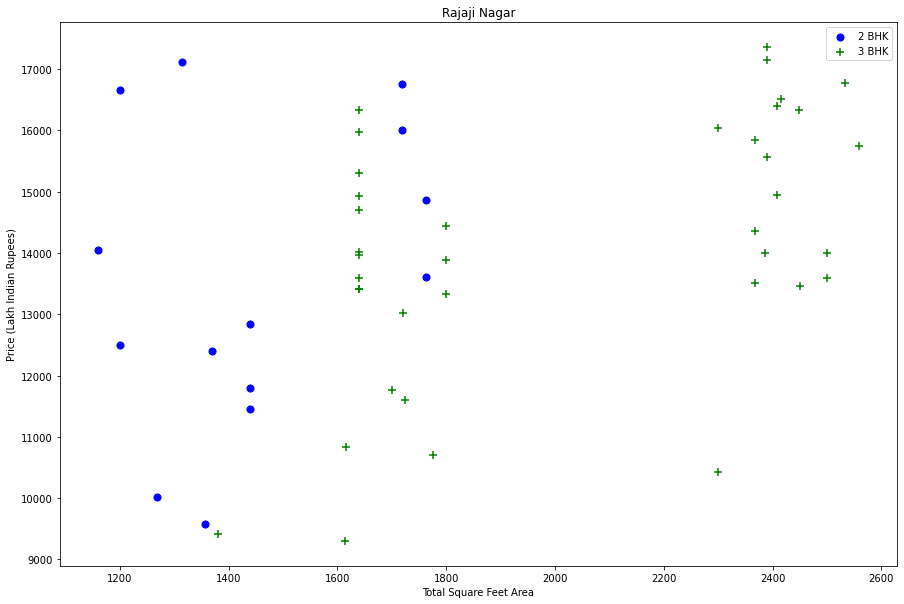

In [56]:
def plot_scatter_chart(df,location):
    BHK2 = df[(df.location==location) & (df.BHK==2)]
    BHK3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price_per_spft,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price_per_spft,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"Rajaji Nagar")

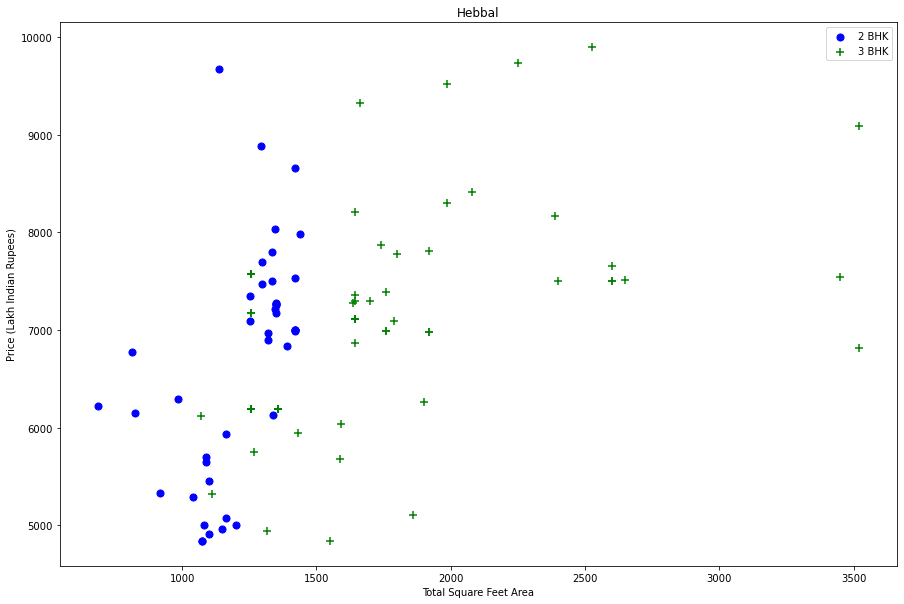

In [58]:
plot_scatter_chart(df5,"Hebbal")

In [60]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_spft),
                'std': np.std(bhk_df.price_per_spft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_spft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7342, 6)

In [48]:
import matplotlib
def plot_scatterplot(df, location):
    BHK2 = df[(df.location)][(int)(df.BHK == 2)]
    BHK3 = df[(df.location)][(int)(df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft, BHK2.price_per_spft, color = 'green', marker = '+', label = '2 BHK', s = 50 )
    plt.scatter(BHK3.total_sqft, BHK3.price_per_spft, color = 'blue', marker = '*', label = '3 BHK', s = 50)
    plt.xlabel('Total Square Feet')
    plt.ylabel('Total Price per Sqft')
    plt.legend()

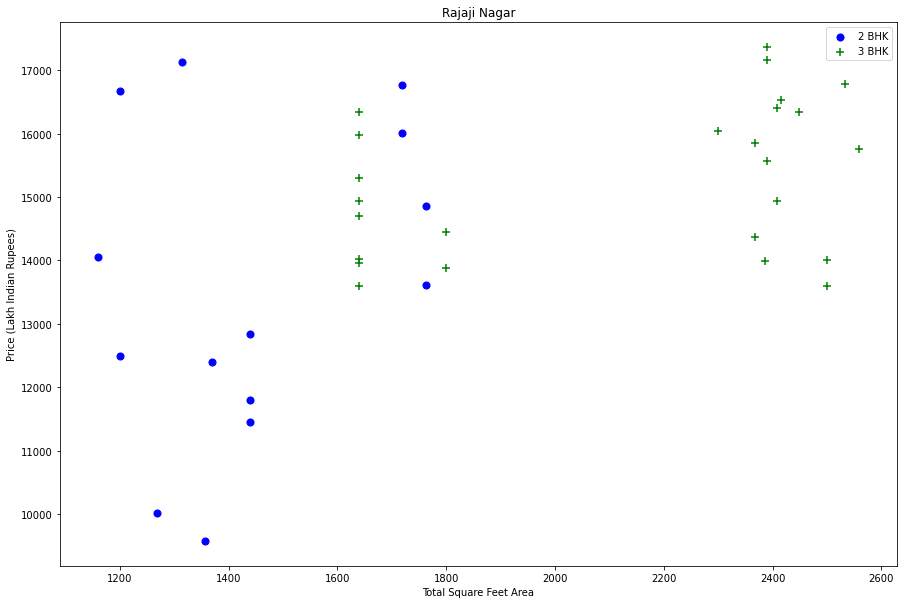

In [62]:
plot_scatter_chart(df6,"Rajaji Nagar")

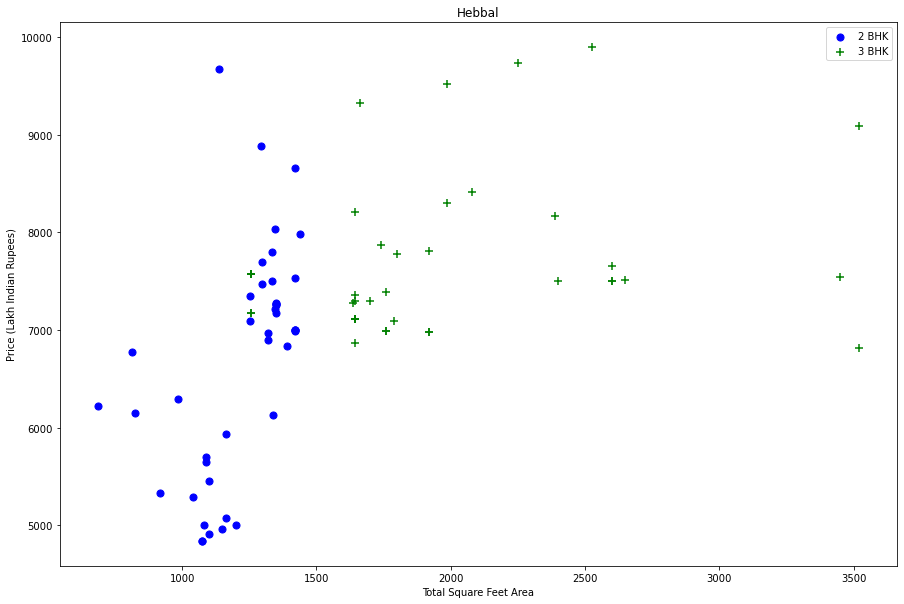

In [63]:
plot_scatter_chart(df6,"Hebbal")

(array([ 560., 3590., 2302.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

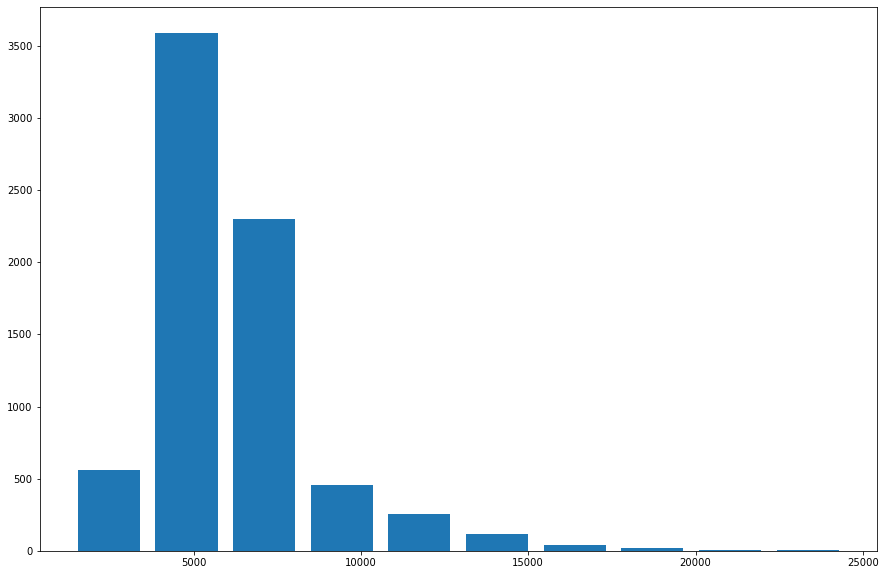

In [65]:
plt.hist(df6.price_per_spft, rwidth =0.8)

In [66]:
df6.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [71]:
df6[df6.bath>df6.BHK+2]

,location,total_sqft,bath,price,BHK,price_per_spft
1637,Chikkabanavar,2460,7.0,80.0,4,3252.032520
5232,Nagasandra,7000,8.0,450.0,4,6428.571429
6702,Thanisandra,1806,6.0,116.0,3,6423.034330
8405,other,11338,9.0,1000.0,6,8819.897689


In [73]:
df7 = df6[df6.bath<df6.BHK+2]
df7.shape

(7264, 6)

In [74]:
df8 = df7.drop(['price_per_spft'], axis = 1)
df8.head()

,location,total_sqft,bath,price,BHK
1,Devarachikkanahalli,1250,2.0,40.0,2
2,Devarachikkanahalli,1200,2.0,83.0,2
3,Devarachikkanahalli,1170,2.0,40.0,2
4,Devarachikkanahalli,1425,2.0,65.0,3
5,Devarachikkanahalli,947,2.0,43.0,2


## Handling Text Column: One-Hot Encoding
Preparing our Data final time before starting to build my model

In [90]:
dummies = pd.get_dummies(df8.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df9 = pd.concat([df8.drop('location', axis = 1), dummies.drop('other', axis = 1)], axis = 1)
df9.head()

,total_sqft,bath,price,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425,2.0,65.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947,2.0,43.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Declaring X & y

In [77]:
X = df9.drop(['price'], axis = 1)
X.head(3)

,total_sqft,bath,BHK,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
y = df9.price
y

1         40.0
2         83.0
3         40.0
4         65.0
5         43.0
         ...  
10235     70.0
10236    200.0
10239    110.0
10240     26.0
10243    400.0
Name: price, Length: 7264, dtype: float64

## Building The Model
Now I proceed to build the Model, this step includes splitting the Dataset for training and testing, fitting it to the model.

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7696222604838817

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv = ss)

array([0.82622112, 0.81408489, 0.87757336, 0.84822747, 0.86091366])

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

## Hyper-Parameter Tuning: To Select The Best Model and Parameters

In [83]:
def best_model(X,y):
    algo ={
        'Linear Regression': {
            'model': LinearRegression(),
            'Params': {
                'normalize': [True,False]
            }   
        },
        'Lasso': {
            'model': Lasso(),
            'Params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }   
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'Params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }   
        }  
    }
    
    scores = []
    ss = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    for algo_name, para in algo.items():
        gs = GridSearchCV(para['model'], para['Params'], cv = ss, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [84]:
best_model(X,y)

,model,best_score,best_params
0,Linear Regression,0.845404,{'normalize': False}
1,Lasso,0.709512,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree,0.681926,"{'criterion': 'mse', 'splitter': 'best'}"


## Testing the Final Model

In [85]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr.predict([x])[0]

In [86]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

88.92567293430257

In [87]:
predict_price('Indira Nagar', 1000, 2, 2)

187.67840045580436

## Saving/Exporting the Final Model

In [88]:
import pickle
with open('House_price_prediction_Project1.pickle', 'wb') as f:
    pickle.dump(lr, f)

In [89]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))